# Drive & Libraries setup

In [1]:
# connect with gdrive
from google.colab import drive
drive.mount('/content/drive')
# %cd /content/drive/MyDrive

# connect with "DPI Summer Interns 2024" folder
!ls "/content/drive/MyDrive/DPI Summer Interns 2024/Hassan/MultiLangPolicyScanner/policy_corpus"

Mounted at /content/drive
corpus		       policies			privacy_links_df.csv	      stopwords
language_policy_links  policy_text_crawl.ipynb	privacy_links_df_updated.csv
misc		       preprocess.ipynb		raw_sorted_policies


In [2]:
!pip install langdetect
!pip install tqdm==4.64.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=cf406b59848895e8ac67d5a8a346f61bf1f07e84d7b71baaaf9fff3cc20d7102
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.4
    Uninstalling tqdm-4.66.4:
      Successfully uninstalled tqdm-4.66.4


In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from langdetect import detect, LangDetectException
import os
from tqdm import tqdm

import requests
import random
import time
from urllib.parse import urlparse, urljoin
from datetime import datetime, timedelta
from concurrent.futures import ThreadPoolExecutor, as_completed
import pandas as pd

## Fix Dataframe

In [4]:
%cd "/content/drive/MyDrive/DPI Summer Interns 2024/Hassan/MultiLangPolicyScanner/policy_corpus"

/content/drive/.shortcut-targets-by-id/1O7dDY06zyuGFOPs6tPr05M2GKlVoONFs/DPI Summer Interns 2024/Hassan/MultiLangPolicyScanner/policy_corpus


In [6]:
# count all files in current folder
len(os.listdir("./policies"))

6405

In [7]:
# read privacy_links_df.csv into a dataframe
privacy_links_df = pd.read_csv('privacy_links_df_updated.csv')

privacy_links_df

,domain,privacy_link,hash,init_language,valid_language,text_content,policy_downloaded
0,mib19.co.kr,https://mib19.co.kr/bbs/content.php?co_id=privacy,a32875bb89f84ee315cf7d0106a4840f46650347607d68...,Korean,ko,NaN,True
1,mib19.co.kr,https://mib19.co.kr/bbs/content.php?co_id=yout...,aa2e31f7380b36a2e16fbb436b00fbe1cf97a8fd7f48c7...,Korean,ko,NaN,True
2,policy.indischool.com,https://policy.indischool.com/community-guidel...,eb8d6cd1d7b8ad74888ff296f85f765a5d1b69f9e42474...,Korean,ko,NaN,True
3,policy.indischool.com,https://policy.indischool.com/articles-of-inco...,4f95f765575537edf6e40533744ea7e33f942e2712c9a8...,Korean,ko,NaN,True
4,policy.indischool.com,https://policy.indischool.com/privacy,bf58e6d95eef65b59867a88ab9ef689fd872d520ddea47...,Korean,ko,NaN,True
...,...,...,...,...,...,...,...
3768,compass.cn,https://compass.cn/html/protocol/use_policy.php,9bc812d2ef725c3e822be1cab4182bc1085e723f84753d...,China,NaN,NaN,False
3769,compass.cn,https://compass.cn/html/protocol/privacy_polic...,44d6b769a8638911bb2e6c2f398e4122b63abd6a684571...,China,NaN,NaN,False
3770,www.d1ev.com,https://www.d1ev.com/about/agreement,c75d1ce24ea10578dcfe56d94acf336c965c9a13fe1baf...,China,NaN,NaN,False
3771,www.hexsen.com,https://www.hexsen.com/nginx-common-security-s...,f65a3ccdbe984d4e68c6cdb84e7d0048ca8d526339d8d1...,China,NaN,NaN,NaN


In [8]:
print(privacy_links_df['init_language'].value_counts())

print(len(privacy_links_df['domain'].unique()))

# print unique init_language Japan domains
print(f"Total unique Japanese domains {len(privacy_links_df[privacy_links_df['init_language'] == 'Japan']['domain'].unique())}")
# korean
print(f"Total unique Korean domains {len(privacy_links_df[privacy_links_df['init_language'] == 'Korean']['domain'].unique())}")
# chinese
print(f"Total unique Chinese domains {len(privacy_links_df[privacy_links_df['init_language'] == 'China']['domain'].unique())}")

init_language
Japan     1828
Korean    1409
China      536
Name: count, dtype: int64
1661
Total unique Japanese domains 808
Total unique Korean domains 592
Total unique Chinese domains 261


In [ ]:
# COMMENT OUT. remove duplicates from privacy_links_df based on privacy_link
privacy_links_df = privacy_links_df.drop_duplicates(subset='privacy_link')


print(privacy_links_df['init_language'].value_counts())

print(len(privacy_links_df['domain'].unique()))

# print unique init_language Japan domains
print(f"Total unique Japanese domains {len(privacy_links_df[privacy_links_df['init_language'] == 'Japan']['domain'].unique())}")
# korean
print(f"Total unique Korean domains {len(privacy_links_df[privacy_links_df['init_language'] == 'Korean']['domain'].unique())}")
# chinese
print(f"Total unique Chinese domains {len(privacy_links_df[privacy_links_df['init_language'] == 'China']['domain'].unique())}")

init_language
Japan     1828
Korean    1409
China      536
Name: count, dtype: int64
1661
Total unique Japanese domains 808
Total unique Korean domains 592
Total unique Chinese domains 261


In [ ]:

# # remove all rows where init_language is Japan
# privacy_links_df = privacy_links_df[privacy_links_df['init_language'] != 'Japan']
# privacy_links_df

,domain,privacy_link,hash,init_language,valid_language,text_content,rank,policy_downloaded
0,mib19.co.kr,https://mib19.co.kr/bbs/content.php?co_id=privacy,a32875bb89f84ee315cf7d0106a4840f46650347607d68...,Korean,ko,NaN,NaN,True
1,mib19.co.kr,https://mib19.co.kr/bbs/content.php?co_id=yout...,aa2e31f7380b36a2e16fbb436b00fbe1cf97a8fd7f48c7...,Korean,ko,NaN,NaN,True
2,policy.indischool.com,https://policy.indischool.com/community-guidel...,eb8d6cd1d7b8ad74888ff296f85f765a5d1b69f9e42474...,Korean,ko,NaN,NaN,True
3,policy.indischool.com,https://policy.indischool.com/articles-of-inco...,4f95f765575537edf6e40533744ea7e33f942e2712c9a8...,Korean,ko,NaN,NaN,True
4,policy.indischool.com,https://policy.indischool.com/privacy,bf58e6d95eef65b59867a88ab9ef689fd872d520ddea47...,Korean,ko,NaN,NaN,True
...,...,...,...,...,...,...,...,...
4403,soboten.com,https://hsbc.com.cn/help/mandatory-info/privac...,53f60ffd01afcfd5993c1cf1fad61e667750b64af6ebb4...,China,zh-cn,NaN,98913.0,True
4404,soboten.com,https://hsbc.com.cn/help/mandatory-info/privac...,915768a3771338b87103eb7fb39b2db5b445fc554e0ab7...,China,zh-cn,NaN,98913.0,True
4405,soboten.com,https://www.hsbc.com.cn/zh-cn/security/registr...,f2ad7432524947c666292a83b79418965306468b981b7d...,China,en,NaN,98913.0,True
4406,soboten.com,https://hsbc.com.cn/help/mandatory-info/privac...,54c241f543dbfc77e18d9ced9e6e8deeb975ce5678a139...,China,zh-cn,NaN,98913.0,True


### Japanese Links

In [ ]:
# read JP_privacy_links_top_1000_df.csv into dataframe
japan_df = pd.read_csv('./language_policy_links/JP_privacy_links_top_1000(Corrected).csv')
# # remove Unnamed: 0 and rank column from japan_df
japan_df = japan_df.drop(['Unnamed: 0', 'rank'], axis=1)

# iterate over japan_df, and check every privacy_link if it present in privacy_links_df
# count = 0
for index, row in japan_df.iterrows():
    privacy_link = row['privacy_link']
    if privacy_link not in privacy_links_df['privacy_link'].tolist():
        # print(f"Privacy link {privacy_link} not found in privacy_links_df")
        # count += 1
        # # add such row to privacy_links_df using values
        privacy_links_df = privacy_links_df._append({"domain": row['domain'], "privacy_link": privacy_link, "hash":row['hash'], "init_language": row['init_language'], "valid_language":row["valid_language"], "text_content": ""}, ignore_index=True)

In [ ]:
print(len(privacy_links_df))
# COMMENT OUT remove duplicates from privacy_links_df based on privacy_link
privacy_links_df = privacy_links_df.drop_duplicates(subset='privacy_link')


print(privacy_links_df['init_language'].value_counts())

print(len(privacy_links_df['domain'].unique()))

# print unique init_language Japan domains
print(f"Total unique Japanese domains {len(privacy_links_df[privacy_links_df['init_language'] == 'Japan']['domain'].unique())}")
# korean
print(f"Total unique Korean domains {len(privacy_links_df[privacy_links_df['init_language'] == 'Korean']['domain'].unique())}")
# chinese
print(f"Total unique Chinese domains {len(privacy_links_df[privacy_links_df['init_language'] == 'China']['domain'].unique())}")

3521
init_language
Japan     1828
Korean    1409
China      284
Name: count, dtype: int64
1521
Total unique Japanese domains 808
Total unique Korean domains 592
Total unique Chinese domains 121


### Chinese Links

In [ ]:
# read china df
china_df = pd.read_csv('./language_policy_links/chinese_privacy_links_df_v3.csv')
# china_df

count = 0
for index, row in china_df.iterrows():
    privacy_link = row['privacy_link']
    if privacy_link not in privacy_links_df['privacy_link'].tolist():
        # print(f"Privacy link {privacy_link} not found in privacy_links_df")
        # count += 1
        # # add such row to privacy_links_df using values
        privacy_links_df = privacy_links_df._append({"domain": row['domain'], "privacy_link": privacy_link, "hash":row['hash'], "init_language": row['init_language'], "valid_language":row["valid_language"], "text_content": ""}, ignore_index=True)

# print(count)

In [ ]:
print(len(privacy_links_df))
# COMMENT OUT remove duplicates from privacy_links_df based on privacy_link
privacy_links_df = privacy_links_df.drop_duplicates(subset='privacy_link')


print(privacy_links_df['init_language'].value_counts())

print(len(privacy_links_df['domain'].unique()))

# print unique init_language Japan domains
print(f"Total unique Japanese domains {len(privacy_links_df[privacy_links_df['init_language'] == 'Japan']['domain'].unique())}")
# korean
print(f"Total unique Korean domains {len(privacy_links_df[privacy_links_df['init_language'] == 'Korean']['domain'].unique())}")
# chinese
print(f"Total unique Chinese domains {len(privacy_links_df[privacy_links_df['init_language'] == 'China']['domain'].unique())}")

3773
init_language
Japan     1828
Korean    1409
China      536
Name: count, dtype: int64
1661
Total unique Japanese domains 808
Total unique Korean domains 592
Total unique Chinese domains 261


In [ ]:
privacy_links_df

,domain,privacy_link,hash,init_language,valid_language,text_content,policy_downloaded
0,mib19.co.kr,https://mib19.co.kr/bbs/content.php?co_id=privacy,a32875bb89f84ee315cf7d0106a4840f46650347607d68...,Korean,ko,NaN,True
1,mib19.co.kr,https://mib19.co.kr/bbs/content.php?co_id=yout...,aa2e31f7380b36a2e16fbb436b00fbe1cf97a8fd7f48c7...,Korean,ko,NaN,True
2,policy.indischool.com,https://policy.indischool.com/community-guidel...,eb8d6cd1d7b8ad74888ff296f85f765a5d1b69f9e42474...,Korean,ko,NaN,True
3,policy.indischool.com,https://policy.indischool.com/articles-of-inco...,4f95f765575537edf6e40533744ea7e33f942e2712c9a8...,Korean,ko,NaN,True
4,policy.indischool.com,https://policy.indischool.com/privacy,bf58e6d95eef65b59867a88ab9ef689fd872d520ddea47...,Korean,ko,NaN,True
...,...,...,...,...,...,...,...
3768,compass.cn,https://compass.cn/html/protocol/use_policy.php,9bc812d2ef725c3e822be1cab4182bc1085e723f84753d...,China,NaN,NaN,False
3769,compass.cn,https://compass.cn/html/protocol/privacy_polic...,44d6b769a8638911bb2e6c2f398e4122b63abd6a684571...,China,NaN,NaN,False
3770,www.d1ev.com,https://www.d1ev.com/about/agreement,c75d1ce24ea10578dcfe56d94acf336c965c9a13fe1baf...,China,NaN,NaN,False
3771,www.hexsen.com,https://www.hexsen.com/nginx-common-security-s...,f65a3ccdbe984d4e68c6cdb84e7d0048ca8d526339d8d1...,China,NaN,,NaN


In [ ]:
# write to privac_links_df to csv
privacy_links_df.to_csv('privacy_links_df_updated.csv', index=False)

In [ ]:
# check frequency of each value in valid_language column

# privacy_links_df['valid_language'].value_counts()
# privacy_links_df['policy_downloaded'].value_counts()


policy_downloaded
True     3088
False     683
Name: count, dtype: int64

## Analyze

In [ ]:
%cd "/content/drive/MyDrive/DPI Summer Interns 2024/Hassan/MultiLangPolicyScanner/policy_corpus"
privacy_links_df_updated = pd.read_csv('privacy_links_df_updated.csv')

# # add "policy_downloaded" column to df
# privacy_links_df_updated['policy_downloaded'] = False

#  policy_downloaded flag
policies_list = os.listdir("./policies/")
for index, row in tqdm(privacy_links_df_updated.iterrows()):
    hash_value = row['hash']
    link = row['privacy_link']
    # check if hash_value.txt file exist in ./policies/ then skip to next link
    if hash_value + ".txt" in policies_list:
        privacy_links_df_updated.loc[index, 'policy_downloaded'] = True
        continue


privacy_links_df_updated

/content/drive/.shortcut-targets-by-id/1O7dDY06zyuGFOPs6tPr05M2GKlVoONFs/DPI Summer Interns 2024/Hassan/MultiLangPolicyScanner/policy_corpus


3771it [00:01, 3403.21it/s]


,domain,privacy_link,hash,init_language,valid_language,text_content,policy_downloaded
0,mib19.co.kr,https://mib19.co.kr/bbs/content.php?co_id=privacy,a32875bb89f84ee315cf7d0106a4840f46650347607d68...,Korean,ko,NaN,True
1,mib19.co.kr,https://mib19.co.kr/bbs/content.php?co_id=yout...,aa2e31f7380b36a2e16fbb436b00fbe1cf97a8fd7f48c7...,Korean,ko,NaN,True
2,policy.indischool.com,https://policy.indischool.com/community-guidel...,eb8d6cd1d7b8ad74888ff296f85f765a5d1b69f9e42474...,Korean,ko,NaN,True
3,policy.indischool.com,https://policy.indischool.com/articles-of-inco...,4f95f765575537edf6e40533744ea7e33f942e2712c9a8...,Korean,ko,NaN,True
4,policy.indischool.com,https://policy.indischool.com/privacy,bf58e6d95eef65b59867a88ab9ef689fd872d520ddea47...,Korean,ko,NaN,True
...,...,...,...,...,...,...,...
3766,www.9kd.com,https://www.9kd.com/legal,456cc2d047805172a70fc56f7870b8fd3f55133ccfc794...,China,NaN,NaN,False
3767,www.9kd.com,https://www.9kd.com/useragreement,e6c66b8e682c490903e789ecab62646ccb0197eb987c16...,China,NaN,NaN,False
3768,compass.cn,https://compass.cn/html/protocol/use_policy.php,9bc812d2ef725c3e822be1cab4182bc1085e723f84753d...,China,NaN,NaN,False
3769,compass.cn,https://compass.cn/html/protocol/privacy_polic...,44d6b769a8638911bb2e6c2f398e4122b63abd6a684571...,China,NaN,NaN,False


# Extracting Policy

In [ ]:
# # read privacy_links_df.csv into a dataframe
# privacy_links_df_updated = pd.read_csv('privacy_links_df_updated.csv')

# only add those "privacy_link" value to list for which "policy_downloaded" is False
privacy_links_toDownload = privacy_links_df[privacy_links_df['policy_downloaded'] == False]['privacy_link'].tolist()

len(privacy_links_toDownload)

560

In [9]:
def fetch_and_convert_website(url):
    try:
        # Fetch the website content
        #
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful

        # Parse the website content
        soup = BeautifulSoup(response.content, 'html.parser')

        # Get text content and remove extra whitespace
        text = soup.get_text(separator=' ', strip=True)

        return text
    except requests.exceptions.RequestException as e:
        print(f"Error fetching the website: {e}")
        return None

def detect_language(text):
    try:
        language = detect(text)
        return language
    except LangDetectException as e:
        print(f"Error detecting language: {e}")
        return None

In [ ]:
for link in tqdm(privacy_links_toDownload):
    hash_value = privacy_links_df_updated[privacy_links_df_updated['privacy_link'] == link]['hash'].values[0]

    if hash_value + ".txt" in os.listdir("./policies/"):
        continue

    text_content = fetch_and_convert_website(link)
    if text_content:

        # Detect and print the language of the text content
        language = detect_language(text_content)
        # update dataframe with valid language using link
        privacy_links_df_updated.loc[privacy_links_df_updated['privacy_link'] == link, 'valid_language'] = language

        with open(f"policies/{hash_value}.txt", "w", encoding='utf-8') as f:
            f.write(text_content)

        # # write to dataframe back to file
        # privacy_links_df.to_csv('privacy_links_df.csv', index=False)


  0%|          | 1/683 [00:01<19:24,  1.71s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.univ100.kr:443/privacy


  0%|          | 2/683 [00:02<12:47,  1.13s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.univ100.kr/privacy


  0%|          | 3/683 [00:03<13:34,  1.20s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.univ100.kr:443/privacy?type=all


  1%|          | 4/683 [00:04<12:16,  1.09s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://univstore.com/policy/privacy


  1%|          | 5/683 [00:05<11:19,  1.00s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://univstore.com/policy/terms


  1%|          | 6/683 [00:06<10:43,  1.05it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://univstore.com/policy/consumer


  1%|          | 7/683 [00:07<09:43,  1.16it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://bingfong.com/privacy.php


  1%|          | 8/683 [00:10<18:24,  1.64s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.cafe24.com/agreement/EFT.html


  1%|▏         | 9/683 [00:11<18:21,  1.63s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.cafe24.com/agreement/privacy-policy.html


  1%|▏         | 10/683 [00:13<18:06,  1.61s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.cafe24.com/agreement/protect-agreement.html


  2%|▏         | 11/683 [00:17<25:35,  2.28s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.cafe24.com/agreement/member.html


  2%|▏         | 12/683 [00:18<22:11,  1.98s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.issuelink.co.kr/basicPage/policy


  2%|▏         | 13/683 [00:22<29:14,  2.62s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://ycipd.hk/price-privacy.html


  2%|▏         | 14/683 [00:23<23:49,  2.14s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://incheonation.kr/privacy


  2%|▏         | 15/683 [00:26<26:24,  2.37s/it]

Error fetching the website: 404 Client Error:  for url: https://kakao.com/page/responsible/policy


  2%|▏         | 16/683 [00:28<24:11,  2.18s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://smdv.kr/member/agreement.html


  2%|▏         | 17/683 [00:29<19:23,  1.75s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://smdv.kr/member/privacy.html


  3%|▎         | 18/683 [00:30<17:35,  1.59s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://daumee.co.kr/member/agreement.html


  3%|▎         | 19/683 [00:31<15:06,  1.37s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://daumee.co.kr/member/agreement.html#contents


  3%|▎         | 20/683 [00:32<13:26,  1.22s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://daumee.co.kr/member/agreement.html#none


  3%|▎         | 21/683 [00:32<12:20,  1.12s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://daumee.co.kr/member/agreement.html#category


  3%|▎         | 22/683 [00:33<11:34,  1.05s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://daumee.co.kr/member/privacy.html


  3%|▎         | 23/683 [00:34<10:55,  1.01it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://daumee.co.kr/member/agreement.html#wrap


  4%|▎         | 24/683 [00:35<11:50,  1.08s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://daumee.co.kr/member/mall_agreement.html


  4%|▎         | 25/683 [00:36<09:12,  1.19it/s]

Error fetching the website: 406 Client Error: Not Acceptable for url: https://tourdeskhawaii.com/ohanataxi/bbs/page.php?hid=privacy


  4%|▍         | 28/683 [00:41<18:31,  1.70s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://upmedia.mg/privacy.php


  4%|▍         | 29/683 [00:43<17:12,  1.58s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://kktvhelp.zendesk.com/hc/zh-tw/articles/6003954817679


  4%|▍         | 30/683 [00:44<16:11,  1.49s/it]

Error fetching the website: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


  5%|▍         | 31/683 [00:46<18:54,  1.74s/it]

Error fetching the website: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


  5%|▍         | 32/683 [00:47<16:23,  1.51s/it]

Error fetching the website: 400 Client Error: Bad Request for url: https://use.go.kr/www/eduinfo/protect/security/security01.jsp


  5%|▍         | 33/683 [00:52<25:29,  2.35s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://envylook.com/member/agreement.html


  5%|▍         | 34/683 [00:53<20:50,  1.93s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://envylook.com/member/privacy.html


  5%|▌         | 35/683 [00:54<18:51,  1.75s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://5278.cc/privacy/policies/health/?entry_point=facebook_page_footer


  5%|▌         | 36/683 [00:55<16:44,  1.55s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://5278.cc/privacy/policy/?entry_point=facebook_page_footer


  5%|▌         | 37/683 [00:58<20:23,  1.89s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://5278.cc/privacy/center/?entry_point=facebook_page_footer


  6%|▌         | 38/683 [01:00<20:25,  1.90s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://5278.cc/policies/cookies/


  6%|▌         | 39/683 [01:01<18:24,  1.71s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://5278.cc/allactivity?privacy_source=activity_log_top_menu


  6%|▌         | 40/683 [01:01<14:03,  1.31s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://114onca.com/bbs/register.php#privacy


  6%|▌         | 41/683 [01:02<11:05,  1.04s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://114onca.com/bbs/page.php?hid=privacy


  6%|▌         | 42/683 [01:07<24:35,  2.30s/it]

Error fetching the website: 400 Client Error: Bad Request for url: http://www.epolicymarket.goe.go.kr/


  6%|▋         | 43/683 [01:08<20:56,  1.96s/it]

Error fetching the website: 403 Client Error: Forbidden for url: http://m.policy.yanolja.com/?t=service&d=m


  6%|▋         | 44/683 [01:09<16:00,  1.50s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://policy.yanolja.com/?t=youth


  7%|▋         | 45/683 [01:09<11:50,  1.11s/it]

Error fetching the website: 403 Client Error: Forbidden for url: http://m.policy.yanolja.com/?t=location&d=m


  7%|▋         | 46/683 [01:13<23:00,  2.17s/it]

Error fetching the website: 403 Client Error: Forbidden for url: http://m.policy.yanolja.com/?t=privacy&d=m


  7%|▋         | 47/683 [01:16<22:53,  2.16s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://policy.yanolja.com/policy/?t=notes-eft


  7%|▋         | 48/683 [01:16<16:44,  1.58s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://policy.yanolja.com/policy/?t=terms-eft


  7%|▋         | 49/683 [01:16<12:28,  1.18s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://cagongtv.com/content/privacy


  7%|▋         | 50/683 [01:18<14:10,  1.34s/it]

Error fetching the website: 403 Client Error: Forbidden for url: http://nekoret.net/privacy-policy/


  7%|▋         | 51/683 [01:19<14:33,  1.38s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://dailygongam.com/member/agreement.html


  8%|▊         | 52/683 [01:20<14:14,  1.35s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://dailygongam.com/member/privacy.html


  8%|▊         | 53/683 [01:22<15:58,  1.52s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://dailygongam.com/member/agreement.html


  8%|▊         | 54/683 [01:28<29:30,  2.82s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://dailygongam.com/member/privacy.html


  8%|▊         | 55/683 [01:29<24:21,  2.33s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://gongskin.co.kr/member/privacy.html


  8%|▊         | 56/683 [01:32<24:03,  2.30s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://gongskin.co.kr/member/agreement.html


  8%|▊         | 57/683 [01:32<19:03,  1.83s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://peacedoorball.blog/hybes-strict-security-revealed-via-an-influencer-vlog-with-le-sserafim/


  8%|▊         | 58/683 [01:34<19:15,  1.85s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.cafe24.com/agreement/EFT.html


  9%|▊         | 59/683 [01:36<18:03,  1.74s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.cafe24.com/agreement/member.html


  9%|▉         | 60/683 [01:38<18:57,  1.83s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.cafe24.com/agreement/protect-agreement.html


  9%|▉         | 61/683 [01:41<23:15,  2.24s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.cafe24.com/agreement/privacy-policy.html


  9%|▉         | 62/683 [01:41<17:33,  1.70s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.buy123.com.tw/page/privacy


  9%|▉         | 63/683 [01:44<20:16,  1.96s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://dermamall.co.kr/member/privacy.html


  9%|▉         | 64/683 [01:45<18:31,  1.80s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://dermamall.co.kr/member/agreement.html


 10%|▉         | 65/683 [01:49<22:51,  2.22s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://sso.cloud.edu.tw/reg/agreement


 10%|▉         | 68/683 [01:50<11:50,  1.15s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://daegusto.me/privacy_pollicy


 10%|█         | 69/683 [01:51<09:31,  1.07it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://bingfong.com/privacy.php


 10%|█         | 70/683 [01:52<10:32,  1.03s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://trueformula.co.kr/member/privacy.html


 10%|█         | 71/683 [01:53<10:01,  1.02it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://trueformula.co.kr/member/agreement.html


 11%|█         | 72/683 [01:54<10:34,  1.04s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://yedam.com/member/agreement.html


 11%|█         | 73/683 [01:55<10:10,  1.00s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://yedam.com/member/privacy.html


 11%|█         | 74/683 [01:56<09:38,  1.05it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://hkjunkcall.com/privacy/policies/health/?entry_point=facebook_page_footer


 11%|█         | 75/683 [01:57<09:00,  1.13it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://hkjunkcall.com/policies/cookies/


 11%|█         | 76/683 [01:58<10:03,  1.01it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://hkjunkcall.com/privacy/policy/?entry_point=facebook_page_footer


 11%|█▏        | 77/683 [01:59<09:28,  1.07it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://hkjunkcall.com/privacy/center/?entry_point=facebook_page_footer


 11%|█▏        | 78/683 [01:59<09:04,  1.11it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://hkjunkcall.com/allactivity?privacy_source=activity_log_top_menu


 12%|█▏        | 81/683 [02:03<11:16,  1.12s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.ekn.kr/web/agree_info.php?mode=privacyNotice


 12%|█▏        | 82/683 [02:04<10:27,  1.04s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://shoppingfun.co/main-privacy.php?member=5880412


 12%|█▏        | 83/683 [02:04<10:01,  1.00s/it]

Error fetching the website: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


 12%|█▏        | 84/683 [02:05<09:40,  1.03it/s]

Error fetching the website: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


 12%|█▏        | 85/683 [02:11<22:44,  2.28s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://yeslivetv.com/privacy-policy/


 13%|█▎        | 86/683 [02:14<26:26,  2.66s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://ctinews.com/privacy


 13%|█▎        | 87/683 [02:15<21:51,  2.20s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.snappytv.com/privacy-policy/


 13%|█▎        | 88/683 [02:16<18:23,  1.85s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://dpgst.com/member/agreement.html


 13%|█▎        | 89/683 [02:18<16:14,  1.64s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://dpgst.com/member/privacy.html


 13%|█▎        | 90/683 [02:19<16:57,  1.72s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://dpgst.com/member/mall_agreement.html


 13%|█▎        | 91/683 [02:20<14:11,  1.44s/it]

Error fetching the website: 404 Client Error: 404 for url: https://smilegatemegaport.com/ko/privacy.do


 13%|█▎        | 92/683 [02:21<12:08,  1.23s/it]

Error fetching the website: 404 Client Error: 404 for url: https://smilegatemegaport.com/ko/legal.do


 14%|█▎        | 93/683 [02:22<12:09,  1.24s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.acmicpc.net/privacy


 14%|█▍        | 94/683 [02:23<12:14,  1.25s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.readytalk.com/privacy-policy/


 14%|█▍        | 95/683 [02:29<23:20,  2.38s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.creme21.co.kr/member/privacy.html


 14%|█▍        | 96/683 [02:30<20:01,  2.05s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.creme21.co.kr/member/agreement.html


 14%|█▍        | 97/683 [02:32<21:48,  2.23s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://creme21.co.kr/member/privacy.html


 14%|█▍        | 98/683 [02:34<20:39,  2.12s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://creme21.co.kr/member/agreement.html


 14%|█▍        | 99/683 [02:35<16:41,  1.71s/it]

Error fetching the website: 502 Server Error: Bad Gateway for url: https://isplus.com/event/view/privacyRenew


 15%|█▍        | 100/683 [02:36<14:57,  1.54s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://www.furuke.com/privacy/policy/?entry_point=facebook_page_footer


 15%|█▍        | 101/683 [02:37<13:40,  1.41s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://www.furuke.com/privacy/policies/health/?entry_point=facebook_page_footer


 15%|█▍        | 102/683 [02:38<12:53,  1.33s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://www.furuke.com/policies/cookies/


 15%|█▌        | 103/683 [02:40<12:31,  1.30s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://www.furuke.com/privacy/center/?entry_point=facebook_page_footer


 15%|█▌        | 104/683 [02:44<21:57,  2.28s/it]

Error fetching the website: 404 Client Error: 404 for url: https://www.ocokorea.com/etc/agreement.do


 15%|█▌        | 105/683 [02:46<20:30,  2.13s/it]

Error fetching the website: 404 Client Error: 404 for url: https://www.ocokorea.com/etc/privacy.do


 16%|█▌        | 106/683 [02:46<15:36,  1.62s/it]

Error fetching the website: 406 Client Error: Not Acceptable for url: https://21stcbc.org/bbs/content.php?co_id=privacy


 16%|█▌        | 108/683 [02:52<22:26,  2.34s/it]

Error fetching the website: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


 16%|█▌        | 109/683 [02:53<18:07,  1.89s/it]

Error fetching the website: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


 16%|█▌        | 110/683 [02:54<15:18,  1.60s/it]

Error fetching the website: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


 16%|█▋        | 111/683 [02:55<12:59,  1.36s/it]

Error fetching the website: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


 16%|█▋        | 112/683 [02:55<11:21,  1.19s/it]

Error fetching the website: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


 17%|█▋        | 113/683 [02:57<11:01,  1.16s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://gaanche.com/member/agreement.html#contents


 17%|█▋        | 114/683 [03:02<22:57,  2.42s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://gaanche.com/member/agreement.html#category


 17%|█▋        | 115/683 [03:03<18:36,  1.97s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://gaanche.com/member/agreement.html#none


 17%|█▋        | 116/683 [03:08<26:40,  2.82s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://gaanche.com/member/agreement.html


 17%|█▋        | 117/683 [03:09<21:07,  2.24s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://gaanche.com/member/privacy.html


 17%|█▋        | 118/683 [03:09<17:14,  1.83s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://gaanche.com/member/mall_agreement.html


 17%|█▋        | 119/683 [03:15<26:26,  2.81s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://hjdeaf.kr/?mode=policy


 18%|█▊        | 120/683 [03:15<19:52,  2.12s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://hjdeaf.kr/?mode=privacy


 18%|█▊        | 121/683 [03:15<14:30,  1.55s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.idus.com/w/board/terms/privacy


 18%|█▊        | 122/683 [03:17<14:58,  1.60s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://grplan.com/skin-skin49/member/privacy.html


 18%|█▊        | 123/683 [03:18<13:54,  1.49s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://grplan.com/skin-skin49/member/agreement.html


 18%|█▊        | 124/683 [03:21<18:48,  2.02s/it]

Error fetching the website: 400 Client Error: Bad Request for url: http://www.meizu.com/en/legal.html


 18%|█▊        | 125/683 [03:22<13:51,  1.49s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.pcone.com.tw/service/privacyPolicy


 18%|█▊        | 126/683 [03:24<14:51,  1.60s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://aboutsome.co.kr/member/privacy.html


 19%|█▊        | 127/683 [03:26<17:42,  1.91s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://grplan.com/member/privacy.html


 19%|█▊        | 128/683 [03:30<21:39,  2.34s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://grplan.com/member/agreement.html


 19%|█▉        | 129/683 [03:31<17:49,  1.93s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://aboutsome.co.kr/member/agreement.html


 19%|█▉        | 130/683 [03:35<24:51,  2.70s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://eyefocus.co.kr/member/agreement.html#category


 19%|█▉        | 131/683 [03:36<19:42,  2.14s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://eyefocus.co.kr/member/agreement.html#contents


 19%|█▉        | 132/683 [03:37<16:12,  1.76s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://eyefocus.co.kr/member/agreement.html


 19%|█▉        | 133/683 [03:38<14:30,  1.58s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://eyefocus.co.kr/member/agreement.html#none


 20%|█▉        | 134/683 [03:43<25:17,  2.76s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://eyefocus.co.kr/member/mall_agreement.html


 20%|█▉        | 135/683 [03:47<28:50,  3.16s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://eyefocus.co.kr/member/agreement.html#wrap


 20%|█▉        | 136/683 [03:49<24:15,  2.66s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://eyefocus.co.kr/member/agreement.html#footer


 20%|██        | 137/683 [03:50<19:24,  2.13s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://eyefocus.co.kr/member/privacy.html


 20%|██        | 138/683 [03:51<16:27,  1.81s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://member.catholic.or.kr/signup-agreement


 20%|██        | 139/683 [03:52<14:51,  1.64s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://s2nd.co.kr/member/privacy.html


 20%|██        | 140/683 [03:53<13:14,  1.46s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://s2nd.co.kr/member/agreement.html


 21%|██        | 141/683 [03:59<25:07,  2.78s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://policies.classting.com/ko/privacy


 21%|██        | 142/683 [04:02<24:07,  2.68s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://piece-worker.com/member/privacy.html


 21%|██        | 143/683 [04:02<19:11,  2.13s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://piece-worker.com/member/agreement.html


 21%|██        | 144/683 [04:04<18:01,  2.01s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.edu-kingdom.com/s/privacy


 21%|██        | 145/683 [04:07<20:24,  2.28s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.edu-kingdom.com/home.php?mod=spacecp&ac=privacy


 21%|██▏       | 146/683 [04:08<16:14,  1.81s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://korbit.co.kr/terms/privacy/


 22%|██▏       | 148/683 [04:17<25:28,  2.86s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://toptoon.net/info/policy_privacy


 22%|██▏       | 149/683 [04:20<26:51,  3.02s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://toptoon.net/info/policy_service


 22%|██▏       | 150/683 [08:43<12:00:16, 81.08s/it]

Error fetching the website: HTTPSConnectionPool(host='thenorthfacekorea.co.kr', port=443): Max retries exceeded with url: /cscenter/policy (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7e29a26f2da0>, 'Connection to thenorthfacekorea.co.kr timed out. (connect timeout=None)'))


 22%|██▏       | 151/683 [13:05<20:00:33, 135.40s/it]

Error fetching the website: HTTPSConnectionPool(host='thenorthfacekorea.co.kr', port=443): Max retries exceeded with url: /cscenter/privacyAndTerms (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7e29a26f3c70>, 'Connection to thenorthfacekorea.co.kr timed out. (connect timeout=None)'))


 22%|██▏       | 152/683 [13:06<14:00:32, 94.98s/it] 

Error fetching the website: 503 Server Error: Service Temporarily Unavailable for url: https://tophub.today/allactivity?privacy_source=activity_log_top_menu


 22%|██▏       | 153/683 [13:09<9:55:54, 67.46s/it] 

Error fetching the website: 503 Server Error: Service Temporarily Unavailable for url: https://tophub.today/privacy/policy/?entry_point=facebook_page_footer


 23%|██▎       | 154/683 [13:10<6:57:12, 47.32s/it]

Error fetching the website: 503 Server Error: Service Temporarily Unavailable for url: https://tophub.today/policies/cookies/


 23%|██▎       | 155/683 [13:10<4:52:12, 33.21s/it]

Error fetching the website: 503 Server Error: Service Temporarily Unavailable for url: https://tophub.today/privacy


 23%|██▎       | 156/683 [13:10<3:24:55, 23.33s/it]

Error fetching the website: 503 Server Error: Service Temporarily Unavailable for url: https://tophub.today/privacy/center/?entry_point=facebook_page_footer


 23%|██▎       | 157/683 [13:13<2:30:26, 17.16s/it]

Error fetching the website: 503 Server Error: Service Temporarily Unavailable for url: https://tophub.today/privacy/policies/health/?entry_point=facebook_page_footer


 23%|██▎       | 158/683 [13:15<1:50:44, 12.66s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/group


 23%|██▎       | 159/683 [13:17<1:22:09,  9.41s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdtuser.sh.gov.cn/uc/register/privacy.html


 23%|██▎       | 160/683 [13:18<1:00:50,  6.98s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=216


 24%|██▎       | 161/683 [13:20<45:47,  5.26s/it]  

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=218


 24%|██▎       | 162/683 [13:21<35:27,  4.08s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=225


 24%|██▍       | 163/683 [13:22<28:21,  3.27s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/group?people=509


 24%|██▍       | 164/683 [13:24<23:02,  2.66s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/group?people=507


 24%|██▍       | 165/683 [13:25<19:08,  2.22s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/group?people=508


 24%|██▍       | 166/683 [13:26<16:41,  1.94s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=240


 24%|██▍       | 167/683 [13:27<15:04,  1.75s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=220


 25%|██▍       | 168/683 [13:29<13:46,  1.60s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=242


 25%|██▍       | 169/683 [13:30<13:03,  1.52s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=235


 25%|██▍       | 170/683 [13:31<12:24,  1.45s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=214


 25%|██▌       | 171/683 [13:33<12:07,  1.42s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=244


 25%|██▌       | 172/683 [13:39<24:45,  2.91s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=227


 25%|██▌       | 173/683 [13:40<20:28,  2.41s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=211


 25%|██▌       | 174/683 [13:41<17:39,  2.08s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=213


 26%|██▌       | 175/683 [13:43<16:31,  1.95s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=212


 26%|██▌       | 176/683 [13:44<14:53,  1.76s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=222


 26%|██▌       | 177/683 [13:46<14:55,  1.77s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=217


 26%|██▌       | 178/683 [13:49<16:48,  2.00s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/group?people=506


 26%|██▌       | 179/683 [13:50<14:39,  1.75s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=215


 26%|██▋       | 180/683 [13:51<13:38,  1.63s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=224


 27%|██▋       | 181/683 [13:53<12:47,  1.53s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=221


 27%|██▋       | 182/683 [13:54<12:54,  1.55s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/group?people=510


 27%|██▋       | 183/683 [13:55<11:53,  1.43s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=219


 27%|██▋       | 184/683 [13:58<14:10,  1.70s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=226


 27%|██▋       | 185/683 [13:59<13:10,  1.59s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=236


 27%|██▋       | 186/683 [14:00<12:28,  1.51s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=237


 27%|██▋       | 187/683 [14:03<15:12,  1.84s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=239


 28%|██▊       | 188/683 [14:04<13:55,  1.69s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=241


 28%|██▊       | 189/683 [14:06<12:59,  1.58s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=238


 28%|██▊       | 190/683 [14:07<12:04,  1.47s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=230


 28%|██▊       | 191/683 [14:09<12:50,  1.57s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=232


 28%|██▊       | 192/683 [14:12<18:40,  2.28s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=243


 28%|██▊       | 193/683 [14:14<17:05,  2.09s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=231


 28%|██▊       | 194/683 [14:17<18:06,  2.22s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=228


 29%|██▊       | 195/683 [14:18<16:14,  2.00s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=229


 29%|██▊       | 196/683 [14:20<15:30,  1.91s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=234


 29%|██▉       | 197/683 [14:21<13:45,  1.70s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://zwdt.sh.gov.cn/govPortals/legalPerson/business?code=223


 29%|██▉       | 198/683 [14:23<15:22,  1.90s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://adererror.com/member/agreement.html


 29%|██▉       | 199/683 [14:28<21:35,  2.68s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://adererror.com/member/privacy.html


 29%|██▉       | 200/683 [14:29<17:39,  2.19s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://bornchamps.com/member/privacy.html


 29%|██▉       | 201/683 [14:33<23:12,  2.89s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://bornchamps.com/member/agreement.html


 30%|██▉       | 202/683 [14:34<16:47,  2.09s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://igo-town.com/security-w.html
Error fetching the website: 403 Client Error: Forbidden for url: https://igo-town.com/return-policy-w.html


 30%|██▉       | 204/683 [14:37<16:18,  2.04s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://www.lgensol.com:443/information-security


 30%|███       | 205/683 [14:40<17:45,  2.23s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://www.lgensol.com:443/privacypolicy


 30%|███       | 206/683 [14:42<16:39,  2.09s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.0db.co.kr/privacy


 30%|███       | 207/683 [14:42<12:43,  1.60s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.yohohongkong.com/zh-hk/privacy


 30%|███       | 208/683 [14:47<21:40,  2.74s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://logger.co.kr/privacy/index.php


 31%|███       | 209/683 [14:50<21:07,  2.67s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://evergreenjb.me/agreement


 31%|███       | 211/683 [14:53<16:37,  2.11s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://balletnmodel.com/?mode=privacy


 31%|███       | 212/683 [14:55<17:12,  2.19s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://balletnmodel.com/?mode=policy


 31%|███       | 213/683 [14:56<13:32,  1.73s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://www.nidbox.com/privacy/policies/health/?entry_point=facebook_page_footer


 31%|███▏      | 214/683 [15:00<17:49,  2.28s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://www.nidbox.com/privacy/center/?entry_point=facebook_page_footer


 31%|███▏      | 215/683 [15:00<13:53,  1.78s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://www.nidbox.com/policies/cookies/


 32%|███▏      | 216/683 [15:01<11:12,  1.44s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://www.nidbox.com/privacy/policy/?entry_point=facebook_page_footer


 32%|███▏      | 217/683 [15:02<10:40,  1.37s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://nidbox.com/about/privacy


 32%|███▏      | 218/683 [15:03<10:18,  1.33s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://inkself.co.kr/member/privacy.html


 32%|███▏      | 219/683 [15:08<18:11,  2.35s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://inkself.co.kr/member/agreement.html


 32%|███▏      | 220/683 [15:08<13:35,  1.76s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://aocpr.com/bbs/page.php?hid=privacy


 32%|███▏      | 221/683 [15:14<21:58,  2.85s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://ondollife.co.kr/member/agreement.html


 33%|███▎      | 222/683 [15:15<17:21,  2.26s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://ondollife.co.kr/member/privacy.html


 33%|███▎      | 223/683 [15:27<39:58,  5.22s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.rakuten.com.tw/policy/?m-id=RADTop-Footer-Policy


 33%|███▎      | 224/683 [15:37<50:52,  6.65s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.rakuten.com.tw/policy/consumer/?m-id=RADTop-Footer-Policy


 33%|███▎      | 225/683 [15:49<1:04:17,  8.42s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.rakuten.com.tw/policy/qa_result_20200/?m-id=RADTop-Footer-Policy


 33%|███▎      | 226/683 [16:02<1:13:14,  9.62s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.rakuten.com.tw/policy/terms_conditions/?m-id=RADTop-Footer-Policy


 33%|███▎      | 227/683 [16:13<1:15:48,  9.97s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.rakuten.com.tw/policy/safety?m-id=RADTop-Footer-Policy


 33%|███▎      | 228/683 [16:24<1:18:57, 10.41s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.rakuten.com.tw/policy/shop/?m-id=RADTop-Footer-Policy


 34%|███▎      | 229/683 [16:36<1:22:44, 10.94s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.rakuten.com.tw/policy/qa_result_20300/?m-id=RADTop-Footer-Policy


 34%|███▎      | 230/683 [16:37<1:00:43,  8.04s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://hotsunglass.co.kr/member/agreement.html


 34%|███▍      | 231/683 [16:38<44:26,  5.90s/it]  

Error fetching the website: 403 Client Error: Forbidden for url: https://hotsunglass.co.kr/member/privacy.html


 34%|███▍      | 232/683 [16:40<33:50,  4.50s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://dashingdiva.co.kr/member/agreement.html


 34%|███▍      | 233/683 [16:41<26:38,  3.55s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://dashingdiva.co.kr/member/privacy.html


 34%|███▍      | 234/683 [16:45<27:06,  3.62s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://bluepops.co.kr/member/agreement.html


 34%|███▍      | 235/683 [16:49<29:19,  3.93s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://bluepops.co.kr/member/privacy.html


 35%|███▍      | 236/683 [16:51<23:03,  3.10s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://ownimgs.com/page/privacy


 35%|███▍      | 237/683 [16:53<20:40,  2.78s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://qq.co.kr/policy/service


 35%|███▍      | 238/683 [16:53<16:25,  2.22s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://qq.co.kr/policy/claim


 35%|███▍      | 239/683 [16:54<13:27,  1.82s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://qq.co.kr/policy/cast


 35%|███▌      | 240/683 [16:55<11:23,  1.54s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://qq.co.kr/policy/youth


 35%|███▌      | 241/683 [16:59<16:11,  2.20s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://qq.co.kr/policy/privacy


 35%|███▌      | 242/683 [17:02<18:59,  2.58s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://qq.co.kr/policy/play


 36%|███▌      | 243/683 [17:03<14:45,  2.01s/it]

Error fetching the website: 503 Server Error: Service Unavailable for url: https://trilltrill.jp/articles/articles/terms#privacy_policy


 36%|███▌      | 244/683 [17:04<11:39,  1.59s/it]

Error fetching the website: 503 Server Error: Service Temporarily Unavailable for url: https://trilltrill.jp/terms#privacy_policy


 36%|███▌      | 245/683 [17:04<09:00,  1.23s/it]

Error fetching the website: 503 Server Error: Service Unavailable for url: https://trilltrill.jp/articles/terms#privacy_policy


 36%|███▌      | 246/683 [17:07<12:30,  1.72s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://booth.pm/ja/privacy/outofjapan.html


 36%|███▌      | 247/683 [17:08<10:41,  1.47s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://booth.pm/ja/privacy/contact_form.html


 36%|███▋      | 248/683 [29:04<26:04:49, 215.84s/it]

Error fetching the website: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


 36%|███▋      | 249/683 [41:01<44:08:18, 366.13s/it]

Error fetching the website: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


 37%|███▋      | 250/683 [41:01<30:50:30, 256.42s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.homes.co.jp/about/service/safetypolicy/?nx_id=v5pc_top_pickup_safetypolicy


 37%|███▋      | 251/683 [41:01<21:33:02, 179.59s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.homes.co.jp/about/service/safetypolicy/


 37%|███▋      | 252/683 [41:02<15:05:09, 126.01s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.homes.co.jp/linkpolicy/


 37%|███▋      | 253/683 [43:12<15:10:09, 127.00s/it]

Error fetching the website: HTTPSConnectionPool(host='1geki.jp', port=443): Max retries exceeded with url: /privacy/ (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7e29a26f0700>, 'Connection to 1geki.jp timed out. (connect timeout=None)'))


 37%|███▋      | 255/683 [43:12<7:24:42, 62.34s/it] 

Error fetching the website: 403 Client Error: Forbidden for url: https://my-best.com/privacy_policy
Error fetching the website: 403 Client Error: Forbidden for url: https://my-best.com/content_policy


 37%|███▋      | 256/683 [43:18<5:22:19, 45.29s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://mitsui-shopping-park.com/policy/%20


 38%|███▊      | 259/683 [43:26<1:59:39, 16.93s/it]

Error fetching the website: 403 Client Error: Forbidden for url: http://laxd.com/privacy.html


 38%|███▊      | 260/683 [43:28<1:28:52, 12.61s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://laxd.com/privacy.html


 38%|███▊      | 261/683 [43:30<1:05:42,  9.34s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://www.ne.jp/service/option/security/norton/


 38%|███▊      | 262/683 [43:31<47:48,  6.81s/it]  

Error fetching the website: 404 Client Error: Not Found for url: https://www.ne.jp/service/option/security/ifilter/


 39%|███▊      | 263/683 [43:32<35:10,  5.02s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://www.ne.jp/service/option/security/mcafee/


 39%|███▊      | 264/683 [43:32<26:11,  3.75s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://www.ne.jp/support/security/


 39%|███▉      | 265/683 [43:33<19:52,  2.85s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://www.ne.jp/service/agreement/


 39%|███▉      | 266/683 [43:35<16:52,  2.43s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://wear.jp/allactivity?privacy_source=activity_log_top_menu


 39%|███▉      | 267/683 [43:36<13:47,  1.99s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://wear.jp/privacy/policy/?entry_point=facebook_page_footer


 39%|███▉      | 269/683 [43:38<10:00,  1.45s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://wear.jp/privacy/center/?entry_point=facebook_page_footer
Error fetching the website: 403 Client Error: Forbidden for url: https://wear.jp/privacy/policies/health/?entry_point=facebook_page_footer


 40%|███▉      | 270/683 [43:38<07:24,  1.08s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://wear.jp/policies/cookies/


 40%|███▉      | 271/683 [43:39<06:46,  1.01it/s]

Error fetching the website: 404 Client Error: Not Found for url: https://www.chatpia.jp/agreement.php


 40%|███▉      | 273/683 [43:40<06:16,  1.09it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://shindanmaker.com/privacy_policy


 40%|████      | 274/683 [43:41<06:11,  1.10it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://workman.jp/shop/pages/guide-privacy.aspx#cookie


 40%|████      | 275/683 [43:42<06:00,  1.13it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://workman.jp/shop/pages/guide-privacy.aspx


 40%|████      | 276/683 [43:44<08:11,  1.21s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.proto-g.co.jp/privacypolicy2.html


 41%|████      | 277/683 [43:46<09:01,  1.33s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.proto-g.co.jp/privacypolicy2.html


 41%|████      | 278/683 [43:47<07:58,  1.18s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://openwork.jp/policy.php


 41%|████      | 279/683 [43:47<07:09,  1.06s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://openwork.jp/privacy.php


 41%|████      | 280/683 [43:49<08:10,  1.22s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://panasonic.co.jp/jp/corporate/sustainability/environment/policy.html


 41%|████      | 281/683 [43:50<07:43,  1.15s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://panasonic.co.jp/jp/corporate/sustainability/diversity-equity-inclusion/policy.html


 41%|████▏     | 282/683 [43:50<06:11,  1.08it/s]

Error fetching the website: 404 Client Error: Not Found for url: https://panasonic.co.jp/jp/socialmedia-policy.html


 41%|████▏     | 283/683 [43:53<09:26,  1.42s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://panasonic.co.jp/jp/privacy-policy.html


 42%|████▏     | 284/683 [43:54<08:40,  1.31s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://panasonic.co.jp/jp/socialmedia-policy/terms-of-use.html


 42%|████▏     | 285/683 [43:55<07:37,  1.15s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://coconala.com/privacy/policies/health/?entry_point=facebook_page_footer


 42%|████▏     | 286/683 [43:56<06:58,  1.05s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://coconala.com/privacy/policy/?entry_point=facebook_page_footer


 42%|████▏     | 287/683 [43:56<06:30,  1.02it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://coconala.com/pages/privacy


 42%|████▏     | 288/683 [43:57<06:11,  1.06it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://coconala.com/allactivity?privacy_source=activity_log_top_menu


 42%|████▏     | 289/683 [43:58<05:48,  1.13it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://coconala.com/policies/cookies/


 42%|████▏     | 290/683 [43:59<05:30,  1.19it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://coconala.com/privacy/center/?entry_point=facebook_page_footer


 43%|████▎     | 291/683 [44:00<05:25,  1.20it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/?cn_device=pc&cn_clicked=header


 43%|████▎     | 292/683 [44:01<06:53,  1.06s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://coconala.com/pages/cookie_policy


 43%|████▎     | 293/683 [44:03<09:13,  1.42s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/


 43%|████▎     | 294/683 [44:07<12:53,  1.99s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/75142?cn_device=pc&cn_clicked=ranking_02


 43%|████▎     | 295/683 [44:11<17:19,  2.68s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/75241?cn_device=pc&cn_clicked=ranking_02


 43%|████▎     | 296/683 [44:12<13:35,  2.11s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/75490?cn_device=pc&cn_clicked=ranking_02


 43%|████▎     | 297/683 [44:13<10:54,  1.70s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/75628?cn_device=pc&cn_clicked=ranking_02


 44%|████▎     | 298/683 [44:13<09:03,  1.41s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/75506?cn_device=pc&cn_clicked=ranking_02


 44%|████▍     | 299/683 [44:14<07:49,  1.22s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/75508?cn_device=pc&cn_clicked=ranking_02


 44%|████▍     | 300/683 [44:16<08:46,  1.37s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/75673?cn_device=pc&cn_clicked=ranking_02


 44%|████▍     | 301/683 [44:17<07:32,  1.18s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/74976?cn_device=pc&cn_clicked=ranking_02


 44%|████▍     | 302/683 [44:17<06:48,  1.07s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/75470?cn_device=pc&cn_clicked=ranking_02


 44%|████▍     | 303/683 [44:23<16:03,  2.54s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/75648?cn_device=pc&cn_clicked=ranking_02


 45%|████▍     | 304/683 [44:24<13:19,  2.11s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/?cn_device=sp&cn_clicked=categories


 45%|████▍     | 305/683 [44:27<13:58,  2.22s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/75375?cn_device=pc&cn_clicked=ranking_02


 45%|████▍     | 306/683 [44:28<11:12,  1.78s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/ranking?cn_device=pc&cn_clicked=ranking_02


 45%|████▍     | 307/683 [44:30<12:32,  2.00s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/75388?cn_device=pc&cn_clicked=ranking_02


 45%|████▌     | 308/683 [44:31<10:08,  1.62s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/75398?cn_device=pc&cn_clicked=ranking_02


 45%|████▌     | 309/683 [44:33<11:13,  1.80s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/75604?cn_device=pc&cn_clicked=ranking_02


 45%|████▌     | 310/683 [44:34<09:14,  1.49s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/75694?cn_device=pc&cn_clicked=ranking_02


 46%|████▌     | 311/683 [44:35<07:53,  1.27s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/75453?cn_device=pc&cn_clicked=ranking_02


 46%|████▌     | 312/683 [44:36<07:52,  1.27s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/75806?cn_device=pc&cn_clicked=ranking_02


 46%|████▌     | 313/683 [44:37<07:05,  1.15s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://legal.coconala.com/bbses/75456?cn_device=pc&cn_clicked=ranking_02


 46%|████▌     | 314/683 [56:31<22:01:48, 214.93s/it]

Error fetching the website: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


 46%|████▋     | 316/683 [56:31<10:44:59, 105.45s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://snkrdunk.com/cookie-policy
Error fetching the website: 403 Client Error: Forbidden for url: https://snkrdunk.com/privacy/


 46%|████▋     | 317/683 [56:32<7:31:26, 74.01s/it]  

Error fetching the website: 403 Client Error: Forbidden for url: https://yogajournal.jp/privacy_policy


 47%|████▋     | 318/683 [56:32<5:16:17, 51.99s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://yogajournal.jp/cookie_policy


 47%|████▋     | 319/683 [56:39<3:52:37, 38.35s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://my.healmate.jp/enrollment/privacy


 47%|████▋     | 320/683 [56:40<2:44:34, 27.20s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://my.healmate.jp/privacy


 47%|████▋     | 321/683 [56:42<1:57:58, 19.55s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://panasonic.biz/jp/corporate/sustainability/diversity-equity-inclusion/policy.html


 47%|████▋     | 322/683 [56:44<1:26:38, 14.40s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://panasonic.biz/jp/privacy-policy.html


 47%|████▋     | 323/683 [56:45<1:02:25, 10.40s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://panasonic.biz/jp/socialmedia-policy/terms-of-use.html


 47%|████▋     | 324/683 [56:48<48:42,  8.14s/it]  

Error fetching the website: 404 Client Error: Not Found for url: https://panasonic.biz/jp/socialmedia-policy.html


 48%|████▊     | 325/683 [56:49<36:10,  6.06s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://panasonic.biz/jp/corporate/sustainability/environment/policy.html


 48%|████▊     | 326/683 [59:04<4:24:54, 44.52s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.mouse-jp.co.jp/store/agreement/agreement.aspx


 48%|████▊     | 327/683 [59:05<3:08:07, 31.71s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.mouse-jp.co.jp/store/privacy/index.aspx


 48%|████▊     | 328/683 [59:06<2:13:06, 22.50s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://nativecamp.net/school/dialog_credit_security


 48%|████▊     | 329/683 [59:07<1:34:37, 16.04s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://nativecamp.net/dialog_credit_security


 48%|████▊     | 330/683 [59:10<1:10:04, 11.91s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://with.is/privacy/policy/?entry_point=facebook_page_footer


 48%|████▊     | 331/683 [59:11<51:14,  8.74s/it]  

Error fetching the website: 404 Client Error: Not Found for url: https://with.is/privacy/center/?entry_point=facebook_page_footer


 49%|████▊     | 332/683 [59:12<37:25,  6.40s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://with.is/allactivity?privacy_source=activity_log_top_menu


 49%|████▉     | 333/683 [59:13<27:26,  4.70s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://with.is/policies/cookies/


 49%|████▉     | 334/683 [59:18<28:53,  4.97s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://with.is/privacy/policies/health/?entry_point=facebook_page_footer


 49%|████▉     | 335/683 [59:19<21:43,  3.75s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://vorkers.com/policy.php


 49%|████▉     | 336/683 [59:22<20:41,  3.58s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://vorkers.com/privacy.php


 49%|████▉     | 337/683 [59:23<15:04,  2.61s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://2nt.com/privacy.html


 49%|████▉     | 338/683 [59:27<18:48,  3.27s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://2nt.com/ja/privacy.html


 50%|████▉     | 339/683 [59:30<17:19,  3.02s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.bandainamcoent.co.jp/privacy/


 50%|████▉     | 340/683 [59:31<13:37,  2.38s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://connpass.com/privacy/


 50%|████▉     | 341/683 [59:35<16:44,  2.94s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://gumpla.jp/privacy/center/?entry_point=facebook_page_footer


 50%|█████     | 342/683 [59:36<14:04,  2.48s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://gumpla.jp/privacy/policy/?entry_point=facebook_page_footer


 50%|█████     | 343/683 [59:37<11:17,  1.99s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://gumpla.jp/policies/cookies/


 50%|█████     | 344/683 [59:42<15:51,  2.81s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://gumpla.jp/privacy/policies/health/?entry_point=facebook_page_footer


 51%|█████     | 345/683 [59:43<12:34,  2.23s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://gumpla.jp/allactivity?privacy_source=activity_log_top_menu


 51%|█████     | 346/683 [59:43<09:07,  1.63s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://byoinnavi.jp/service/for_medical/publish_policy#publish_policy_images


 51%|█████     | 347/683 [59:49<16:07,  2.88s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://byoinnavi.jp/service/for_medical/publish_policy


 51%|█████     | 348/683 [59:49<11:38,  2.08s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://byoinnavi.jp/service/for_medical/publish_policy#publish_policy_corps


 51%|█████     | 349/683 [59:49<08:30,  1.53s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://byoinnavi.jp/service/for_medical/publish_policy#publish_policy_expression


 51%|█████     | 350/683 [59:51<08:17,  1.49s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://byoinnavi.jp/service/for_medical/publish_policy#publish_policy_corp_items


 51%|█████▏    | 351/683 [59:51<06:08,  1.11s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://byoinnavi.jp/service/for_medical/publish_policy#publish_policy_spec


 52%|█████▏    | 353/683 [59:52<04:14,  1.29it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://byoinnavi.jp/service/for_medical/publish_policy#publish_policy_index
Error fetching the website: 403 Client Error: Forbidden for url: https://byoinnavi.jp/service/for_medical/publish_policy#publish_policy_expression_index1


 52%|█████▏    | 355/683 [59:52<02:36,  2.10it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://byoinnavi.jp/service/for_medical/publish_policy#publish_policy_expression_index2
Error fetching the website: 403 Client Error: Forbidden for url: https://byoinnavi.jp/service/for_medical/publish_policy#publish_policy_expression_index7


 52%|█████▏    | 356/683 [59:53<02:21,  2.32it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://byoinnavi.jp/service/for_medical/publish_policy#publish_policy_expression_index1_notice


 52%|█████▏    | 357/683 [59:54<04:31,  1.20it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://byoinnavi.jp/service/for_medical/publish_policy#publish_policy_expression_index6


 52%|█████▏    | 358/683 [59:57<07:00,  1.29s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://byoinnavi.jp/service/for_medical/publish_policy#publish_policy_expression_index5


 53%|█████▎    | 359/683 [59:57<05:13,  1.03it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://byoinnavi.jp/service/for_medical/publish_policy#publish_policy_expression_index8


 53%|█████▎    | 360/683 [59:57<04:03,  1.33it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://byoinnavi.jp/service/for_medical/publish_policy#publish_policy_expression_index3


 53%|█████▎    | 361/683 [1:00:00<07:17,  1.36s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://byoinnavi.jp/service/for_medical/publish_policy#publish_policy_expression_index4


 53%|█████▎    | 362/683 [1:00:01<07:14,  1.36s/it]

Error fetching the website: 403 Client Error: Forbidden for url: http://sirok.co.jp/privacy-policy/


 53%|█████▎    | 363/683 [1:00:03<07:20,  1.38s/it]

Error fetching the website: 403 Client Error: Forbidden for url: http://sirok.co.jp/privacy-policy/


 53%|█████▎    | 364/683 [1:00:04<07:22,  1.39s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://pcolle.com/info/privacy


 53%|█████▎    | 365/683 [1:00:05<06:51,  1.29s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.telnavi.jp/agreement/


 54%|█████▎    | 366/683 [1:00:06<06:24,  1.21s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.telnavi.jp/privacy/


 54%|█████▎    | 367/683 [1:00:07<05:42,  1.08s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://ieyasu.co/privacy/login


 54%|█████▍    | 368/683 [1:00:08<05:36,  1.07s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://hall-navi.com/text_ppolicy


 54%|█████▍    | 370/683 [1:00:10<04:43,  1.11it/s]

Error fetching the website: 404 Client Error: Not Found for url: https://service.wi2.ne.jp/rules/privacy-utilization.html


 54%|█████▍    | 371/683 [1:00:10<04:27,  1.17it/s]

Error fetching the website: 404 Client Error: Not Found for url: https://service.wi2.ne.jp/rules/privacy.html


 54%|█████▍    | 372/683 [1:00:11<04:19,  1.20it/s]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.buffett-code.com/legal


 55%|█████▍    | 373/683 [1:00:16<10:05,  1.95s/it]

Error fetching the website: 403 Client Error: Forbidden for url: http://www.buffett-code.com/legal


 55%|█████▍    | 374/683 [1:00:18<09:59,  1.94s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://muragon.com/policy/tos


 55%|█████▍    | 375/683 [1:00:18<08:07,  1.58s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://muragon.com/policy/privacy


 55%|█████▌    | 376/683 [1:00:19<06:50,  1.34s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://muragon.com/policy/commerce


 55%|█████▌    | 377/683 [1:00:20<06:48,  1.34s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://vernis.co.jp/privacy.php


 55%|█████▌    | 378/683 [1:00:21<06:09,  1.21s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://pachiseven.jp/privacy/


 55%|█████▌    | 379/683 [1:00:24<08:56,  1.76s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://shop.afternoon-tea.net/shop/pages/privacy.aspx


 56%|█████▌    | 380/683 [1:00:28<11:39,  2.31s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://shop.afternoon-tea.net/shop/pages/cookie_policy.aspx


 56%|█████▌    | 381/683 [1:00:29<09:40,  1.92s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://digicame-info.com/webpage/privacypolicy.html


 56%|█████▌    | 382/683 [1:00:31<09:39,  1.92s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://jade-net-home.com/about/privacy_policy


 56%|█████▌    | 383/683 [1:00:36<14:16,  2.85s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.pola.co.jp/privacy/rule/


 56%|█████▌    | 384/683 [1:00:38<12:29,  2.51s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.pola.co.jp/privacy/index.html


 56%|█████▋    | 385/683 [1:00:38<09:10,  1.85s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://pola.co.jp/privacy/index.html


 57%|█████▋    | 386/683 [1:00:38<06:47,  1.37s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://pola.co.jp/privacy/rule/


 57%|█████▋    | 388/683 [1:00:40<05:54,  1.20s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://ei-navi.jp/policy/privacy_policy.html


 57%|█████▋    | 389/683 [1:00:41<05:12,  1.06s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://ei-navi.jp/policy/site_policy.html


 57%|█████▋    | 390/683 [1:00:42<05:13,  1.07s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://kimini.online/policies/cookies/


 57%|█████▋    | 391/683 [1:00:43<04:58,  1.02s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://kimini.online/privacy/center/?entry_point=facebook_page_footer


 57%|█████▋    | 392/683 [1:00:44<04:47,  1.01it/s]

Error fetching the website: 404 Client Error: Not Found for url: https://kimini.online/privacy/policies/health/?entry_point=facebook_page_footer


 58%|█████▊    | 393/683 [1:00:45<04:40,  1.03it/s]

Error fetching the website: 404 Client Error: Not Found for url: https://kimini.online/privacy/policy/?entry_point=facebook_page_footer


 58%|█████▊    | 394/683 [1:00:47<05:47,  1.20s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://kimini.online/allactivity?privacy_source=activity_log_top_menu


 58%|█████▊    | 395/683 [1:00:49<07:39,  1.60s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://www.hokkaido-airports.com/rd_newchitose/bf/news/security-check.html


 58%|█████▊    | 396/683 [1:00:53<10:23,  2.17s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://kurumaerabi.com/info/privacy/


 58%|█████▊    | 397/683 [1:00:54<08:47,  1.85s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://kurumaerabi.com/policy/


 58%|█████▊    | 398/683 [1:00:54<06:45,  1.42s/it]

Error fetching the website: 403 Client Error: Forbidden for url: http://shop.badmoon-racing.jp/help/privacy


 58%|█████▊    | 399/683 [1:00:56<07:10,  1.52s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://badmoon-racing.jp/contents/category/privacy-policy/


 59%|█████▊    | 400/683 [1:00:57<06:47,  1.44s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.j-guitar.com/guide/privacy.php


 59%|█████▊    | 401/683 [1:01:03<12:12,  2.60s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.twellv.co.jp/corporate/privacy_policy/


 59%|█████▉    | 402/683 [1:01:03<09:16,  1.98s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.twellv.co.jp/corporate/site_policy


 59%|█████▉    | 403/683 [1:01:05<09:47,  2.10s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://www.twellv.co.jp/corporate/security


 59%|█████▉    | 404/683 [1:01:07<09:13,  1.98s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://hitohana.tokyo/guides/privacy_policy


 59%|█████▉    | 405/683 [1:01:12<12:42,  2.74s/it]

Error fetching the website: 404 Client Error: Not Found for url: https://ultra-soccer.jp/index/index/c/corp_info/id/privacy_policy2


 59%|█████▉    | 406/683 [1:01:13<11:01,  2.39s/it]

Error fetching the website: 418 Client Error:  for url: https://www.douban.com/about/legal


 60%|█████▉    | 407/683 [1:01:14<08:51,  1.93s/it]

Error fetching the website: HTTPSConnectionPool(host='www.miaozhen.com', port=443): Max retries exceeded with url: /cn/privacy (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))


 60%|█████▉    | 408/683 [1:01:21<15:14,  3.33s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://product.yesky.com/netsecurity/


 60%|█████▉    | 409/683 [1:01:22<12:42,  2.78s/it]

Error fetching the website: 403 Client Error: Forbidden for url: https://product.yesky.com/securitysystem/


In [12]:
# create list privacy_links where language is nan
privacy_links_languages_nan = privacy_links_df[privacy_links_df['valid_language'].isna()]['privacy_link'].tolist()

print(len(privacy_links_languages_nan))

# check how many of these are in ./policies folder
count = 0
poli_files = os.listdir("./policies/")
for link in privacy_links_languages_nan:
    # get hash value from df
    hash_value = privacy_links_df[privacy_links_df['privacy_link'] == link]['hash'].values[0]

    # check if hash_value.txt file exist in ./policies/ then skip to next link
    if hash_value + ".txt" in poli_files:
        count += 1

count

print(f"language is missing for {len(privacy_links_languages_nan)} and {count} are present in folder")

544
language is missing for 544 and 0 are present in folder


In [11]:
#  Update valid_language in dataframe
for link in tqdm(privacy_links_languages_nan):
    hash_value = privacy_links_df[privacy_links_df['privacy_link'] == link]['hash'].values[0]

    # check if hash_value.txt file exist in ./policies/ then skip to next link
    if hash_value + ".txt" in os.listdir("./policies/"):
        with open(f"policies/{hash_value}.txt", "r", encoding='utf-8') as f:
            text_content = f.read()
        language = detect_language(text_content)
        privacy_links_df.loc[privacy_links_df['privacy_link'] == link, 'valid_language'] = language


100%|██████████| 561/561 [11:58<00:00,  1.28s/it]


In [13]:
privacy_links_df.to_csv('privacy_links_df_updated.csv', index=False)


# Test and Check Progress

In [ ]:
#  count files in ./policies/ directory
len(os.listdir("./policies/"))


6245

In [ ]:
# copy (do not cut paste) every file in ./corpus into ./policies folder as well

for file in os.listdir("./corpus/"):
    if file.endswith(".txt"):
        os.rename(f"./corpus/{file}", f"./policies/{file}")

In [14]:
# print count of different value in valid_language column
privacy_links_df['valid_language'].value_counts()


valid_language
ja       1599
ko        916
zh-cn     439
en        198
bn         25
vi         15
tr         12
zh-tw       5
ca          4
es          3
no          2
nl          2
it          2
de          1
pt          1
ru          1
fr          1
so          1
th          1
cy          1
Name: count, dtype: int64

In [15]:
# in privacy_links_df['valid_language'] where value is zh-cn, read them from "./policies"
# and make a copy of them and move the copy to "./raw_sorted_policies/chinese_raw" using their hash value

chinese_hash_list = privacy_links_df[privacy_links_df['valid_language'] == 'zh-cn']['hash'].tolist()
chinese_hash_list.extend()
print(len(chinese_hash_list))


444


## Separate Korean, Chinese, and Japanese Policies

In [ ]:
# check how many values from hash column in privacy_links_df_updated are present in ./policies folder
hash_list = privacy_links_df['hash'].tolist()

count = 0
for hash_value in hash_list:
    if os.path.exists(f"./policies/{hash_value}.txt"):
        privacy_links_df.loc[privacy_links_df['hash'] == hash_value, 'policy_downloaded'] = True
        count += 1

print(f"Number of files in ./policies folder that exist in privacy_links_df_updated: {count}")
print(f"Percentage of files in ./policies folder that exist in privacy_links_df_updated: {count/len(hash_list)}")

print(f"Value counts of policy downloaded {privacy_links_df['policy_downloaded'].value_counts()}")

# find total init_language for each language and then print how many of them have true policy downloaded
print(privacy_links_df['init_language'].value_counts())


# check valid_language distribution filtered on "policy_downloaded" column
print(privacy_links_df[privacy_links_df['policy_downloaded'] == True]['init_language'].value_counts())

print(privacy_links_df[privacy_links_df['policy_downloaded'] == True]['valid_language'].value_counts())


Number of files in ./policies folder that exist in privacy_links_df_updated: 3212
Percentage of files in ./policies folder that exist in privacy_links_df_updated: 0.8513119533527697
Value counts of policy downloaded policy_downloaded
True     3212
False     560
Name: count, dtype: int64
init_language
Japan     1828
Korean    1409
China      536
Name: count, dtype: int64
init_language
Japan     1668
Korean    1167
China      377
Name: count, dtype: int64
valid_language
ja       1596
ko        915
zh-cn     311
en        192
bn         25
vi         14
tr         12
zh-tw       5
ca          4
es          3
nl          2
it          2
no          1
de          1
pt          1
ru          1
fr          1
so          1
th          1
Name: count, dtype: int64


In [ ]:
# make a copy of files using their hash value where valid_language is ja, zh-cn, ko, zh-tw
ja_privacy_df = privacy_links_df_updated[(privacy_links_df_updated['valid_language'] == 'ja')]
zh_cn_privacy_df = privacy_links_df_updated[(privacy_links_df_updated['valid_language'] == 'zh-cn')]
ko_privacy_df = privacy_links_df_updated[(privacy_links_df_updated['valid_language'] == 'ko')]
zh_tw_privacy_df = privacy_links_df_updated[(privacy_links_df_updated['valid_language'] == 'zh-tw')]

hash_list = ja_privacy_df['hash'].tolist()
hash_list.extend(zh_cn_privacy_df['hash'].tolist())
hash_list.extend(ko_privacy_df['hash'].tolist())
hash_list.extend(zh_tw_privacy_df['hash'].tolist())

# move a copy of each hash value in hash_list to corpus directory
for hash_value in hash_list:
    if os.path.exists(f"./policies/{hash_value}.txt"):
        os.rename(f"./policies/{hash_value}.txt", f"./corpus/{hash_value}.txt")

In [ ]:
# check duplicate of hash value in privacy_links_df_updated
print(f"No of duplicate hash values in privacy_links_df_updated: {privacy_links_df_updated.duplicated(subset='hash').sum()}")
duplicate_hash_list = privacy_links_df_updated[privacy_links_df_updated.duplicated(subset='hash')]['hash'].tolist()

# store duplicate

# check if there is hash value in privacy_links_df_updated which has different valid_language value


No of duplicate hash values in privacy_links_df_updated: 1217


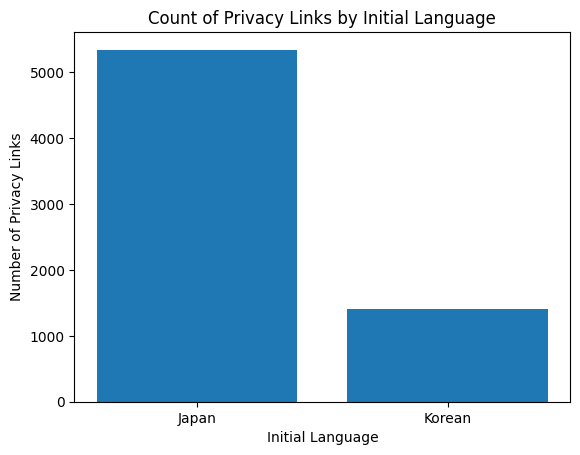

In [ ]:
# @title Count of Privacy Links by Initial Language

import matplotlib.pyplot as plt

# Group the data by initial language and count the number of privacy links
link_counts = privacy_links_df.groupby('init_language')['privacy_link'].count()

# Create a bar chart
plt.bar(link_counts.index, link_counts.values)

# Set the title and labels
plt.title('Count of Privacy Links by Initial Language')
plt.xlabel('Initial Language')
_ = plt.ylabel('Number of Privacy Links')